<a href="https://colab.research.google.com/github/Anuj-gitch/DataScience/blob/main/Heard_disease_detection/Heart_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## **Preparing the Tools**

In [1]:

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## **Reading CSV File in Google Colab from Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Heart_Disease_detection_project/heart-disease.csv')

In [4]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


#**Exploratory Data Analysis**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Info shows us the data type. Here all variables are int or float type so we didn't required any preprocess or encoding.

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Describe shows different arthmetic aspect of this dataset. Like Mean, mode, median and many more

**Check for missing Data**

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No Missing Data

In [8]:
# lets see the predictive variable

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

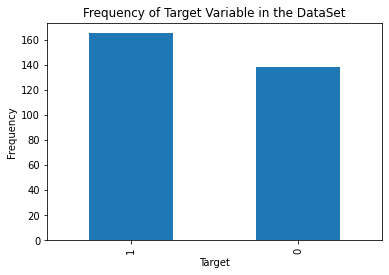

In [9]:
# lets visualize

df['target'].value_counts().plot(kind = 'bar')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Frequency of Target Variable in the DataSet')
plt.show();

As we can see the number of people having heart disease is more then the number of people do not having heart disease


**Lets See the how it differ with in the sex**

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

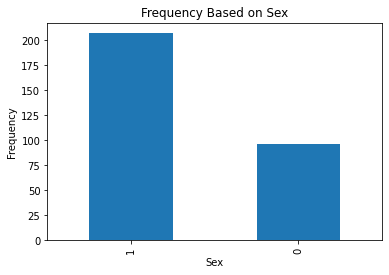

In [11]:
df.sex.value_counts().plot(kind = 'bar')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Frequency Based on Sex')
plt.show();

As we can see number of male Patient is more then number of Female Patient

**Counting target based on sex**

In [12]:
crosstab = pd.crosstab(df.target, df.sex)
crosstab

sex,0,1
target,,
0,24,114
1,72,93


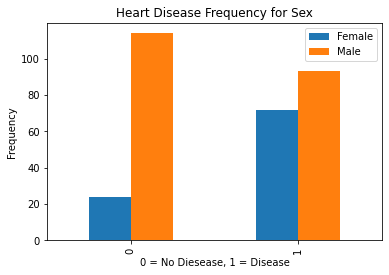

In [13]:
crosstab.plot(kind = 'bar')
plt.ylabel('Frequency')
plt.title('Heart Disease Frequency for Sex')
plt.legend(['Female','Male'])
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.show();

In [14]:
crosstab['Total'] = crosstab[0] + crosstab[1]
crosstab['% Of Total'] = round(crosstab[1] / crosstab['Total'] * 100 ,2)

In [15]:
crosstab

sex,0,1,Total,% Of Total
target,,,,
0,24,114,138,82.61
1,72,93,165,56.36


AS we can see that `% Of Total Afected` is higher in the women as compare to men

### **Age Vs Max Heart Rate for Heart Disease**

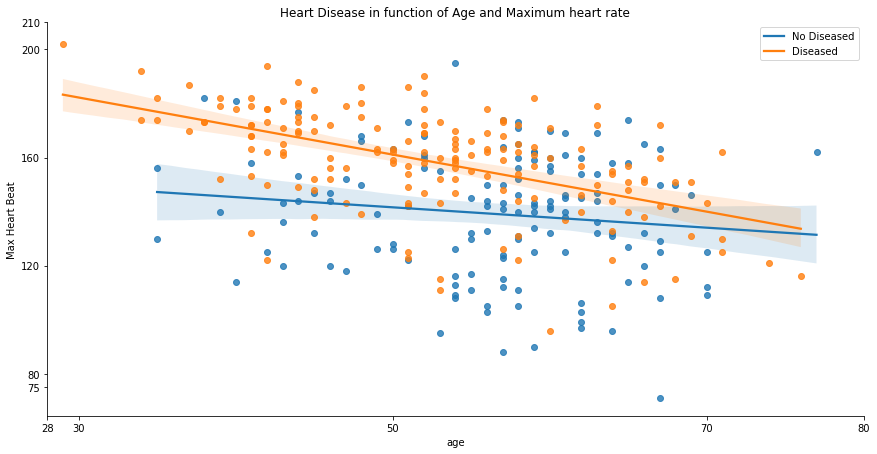

In [16]:
g = sns.lmplot(x='age',y='thalach',data=df, hue = 'target', legend = False, height = 6 , aspect = 2)
g.set(xticks=[28,30, 50, 70, 80], yticks=[75, 80, 120, 160, 200, 210])
plt.xlabel('age')
plt.ylabel('Max Heart Beat')
plt.title('Heart Disease in function of Age and Maximum heart rate')
plt.legend(['No Diseased','Diseased'])
plt.show()

Here we can Observe two things:
1. In not diseased patient Heart beat remain normal and it is not much effected by the age
2. In diseased patient heart beat decreased as the age increases.


In [17]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


### **Lets See The Distribution of age amont patient** 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


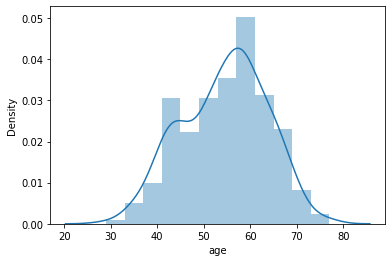

In [18]:
sns.distplot(df.age);

Age Seems to be normally distributed as most of the patient fall between 45 to 65

In [19]:
target_vs_cp = pd.crosstab(df.cp, df.target)
target_vs_cp

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


### **Heart Diseased Frequency Per Chest Pain Type**

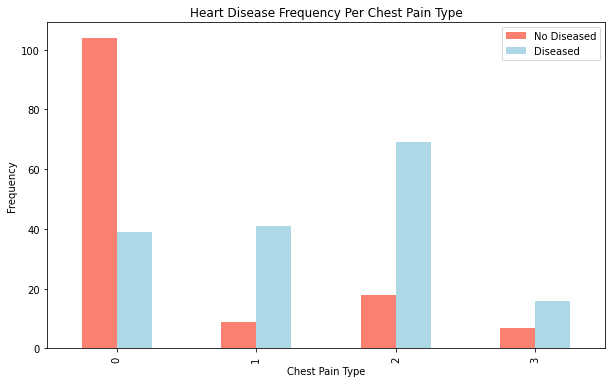

In [20]:
target_vs_cp.plot(kind = 'bar', color = ['salmon','lightblue'], figsize = (10,6))
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.legend(['No Diseased', 'Diseased'])
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.show()

In [21]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


### **HeatMap of Correlation Matrix**

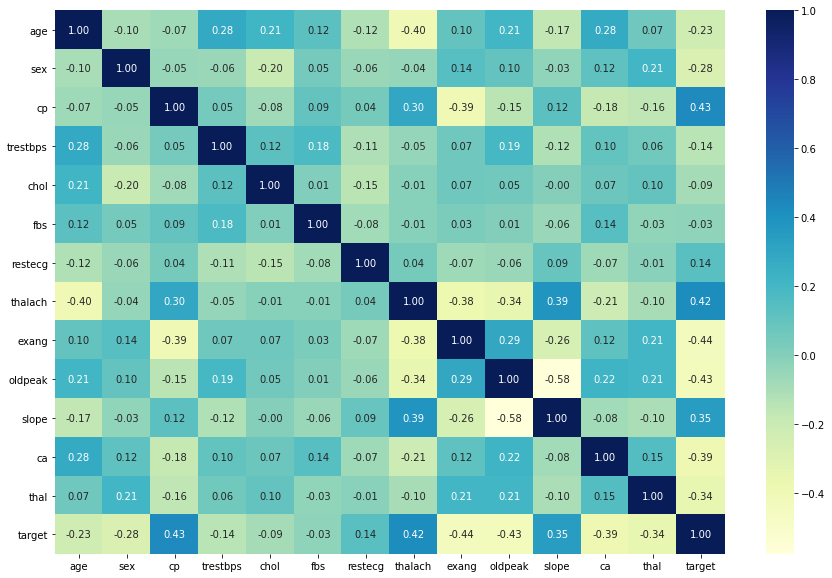

In [22]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot= True, cmap = 'YlGnBu', fmt='.2f')
plt.show();

# **Modeling**

In [23]:
# data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
#spliting data into x and y

x = df.drop('target', axis = 1)
y = df['target']

In [25]:
# splitting data into train and test
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [26]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

Defining Function which store 3 model
1. LogisticRegression
2. RandomForestRegression
3. KNearestNeighbor regression

In [27]:
def model(X_train, X_test, y_train, y_test):
  # intantiating the model
  lr = LogisticRegression()
  clf = RandomForestClassifier()
  Knn = KNeighborsClassifier()

  # fitting the model
  lr.fit(X_train, y_train)
  clf.fit(X_train, y_train)
  Knn.fit(X_train,y_train)

  # model Dictionary
  Model_Dict = {'LogisticRegression':round(lr.score(X_test,y_test) * 100,2),
                'RandomForestClassifier_Score' : round(clf.score(X_test,y_test)*100,2),
                'KNeighborsClassifier_Score' : round(Knn.score(X_test,y_test)*100,2)}

  return Model_Dict


In [28]:
model(X_train,X_test,y_train,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNeighborsClassifier_Score': 68.85,
 'LogisticRegression': 88.52,
 'RandomForestClassifier_Score': 85.25}

## **Let's Visualize the result we have obtained**

In [29]:
model_df = pd.DataFrame(model(X_train, X_test, y_train, y_test), index = ['Accuracy']).T
model_df

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Accuracy
LogisticRegression,88.52
RandomForestClassifier_Score,86.89
KNeighborsClassifier_Score,68.85


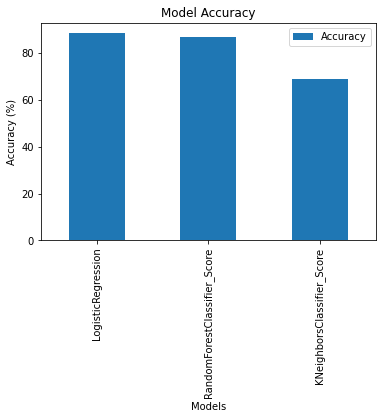

In [30]:
model_df.plot(kind = 'bar')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy')
plt.show()

From this chart we can easly see that Logistic Regression is a best fit Model among three model we used.

# **Hyperparameter Tuning**

1. By Hand
2. RandomSearchCv
3. GridSearchCv

### **Tuning HyperParamer by Hand (KNeariestNeighbor)**

In [31]:
# Lets tune KNN
test_score = []
train_score = []

# setting up the neibors
neibours = range(1,21)

# intentialting the model
Knn = KNeighborsClassifier()

# using for loop
for i in neibours:
  Knn.set_params(n_neighbors = i)

  Knn.fit(X_train, y_train)

  train_score.append(Knn.score(X_train,y_train))

  test_score.append(Knn.score(X_test,y_test))


In [32]:

test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [33]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

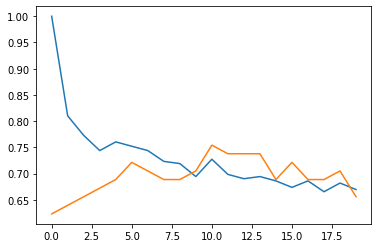

In [34]:
# let see it visual
plt.plot(train_score)
plt.plot(test_score)
plt.show();

## **HyperParameter Tuning With RandomSearchCv and GridSearchCv** 

1. Logistic Regression
2. RandomForestClassifier

### **Tunning LogisticRegression**

**Tuning Logistic Regression Using RandomSearchCv**

In [35]:
lr = LogisticRegression(max_iter = 1000)
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

Set Parameter for logistic Regression

In [36]:
# creating hyperparameter grid for logistic Regression
log_reg_grid = [{
    'C': np.logspace(-4,4,20),
    'solver' : ['liblinear', 'newton-cg', 'sag' , 'saga', 'lbfgs'],
    'max_iter' : [100,200,2500,5000],
    'penalty' : ['l1','l2','elasticnet','none']

}]

In [37]:
# lets Tune
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(estimator= LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

In [38]:
# fiting the tuned model
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not 

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions=[{'C'...
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 200, 2500, 5000],
            

In [39]:
# checking the score again
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Checking for best hyperparameter for logistic regression using `best_params_`

In [40]:
rs_log_reg.best_params_

{'C': 0.0006951927961775605,
 'max_iter': 5000,
 'penalty': 'none',
 'solver': 'sag'}

**Now using `GridSearchCv` to tune the Logistic Regression**

In [41]:
clf = GridSearchCV(LogisticRegression(), param_grid = log_reg_grid, cv = 5, verbose=True, n_jobs=-1)

In [ ]:
# Fitting the model
clf.fit(X_train,y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 2062 tasks      | elapsed:   36.6s


In [ ]:
# Checking the result
clf.score(X_test,y_test)

### **Tuning Random Forest Classifier**

**Tune the hyperparameter for `RandomForestClassifier()` Using RandomSearchCv**

In [ ]:
rf = RandomForestClassifier()
rf.get_params

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# using RandomSearchCv
rf_serchcv = RandomizedSearchCV(estimator=RandomForestClassifier(), 
                                param_distributions = random_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)


In [ ]:
rf_serchcv.fit(X_train,y_train)
rf_serchcv.score(X_test, y_test)

**Tuning RandomForestClassifier with GridSearchCv**

In [ ]:

# Create the random grid for gridsearchcv

random_grid = {'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
rf_gridcv = GridSearchCV(estimator= RandomForestClassifier(), param_grid= random_grid, cv = 5, verbose = True , n_jobs = -1)

In [ ]:
rf_gridcv.fit(X_train, y_train)
rf_gridcv.score(X_test, y_test)

# **Evaluting our tuned machine learning classifier, beyond accuracy**

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [ ]:
# first we need to predict

y_pred = clf.predict(X_test)
display(f'This Logistic Regression : {y_pred}')
rf_grid_pred = rf_gridcv.predict(X_test)
display(f'this is RandomForest : {rf_grid_pred}')

## **Roc Curve**

In [ ]:
# ploting Roc_curve
plot_roc_curve(clf, X_test, y_test);



Area Under Curve of our model is 0.92. Area which is downword from the curve

Changes occurs in the line is due to change in the threshold or propability.


    True Positive Rates : True_positive/(True_Positive + False_Negitive)

* True_Positive : Predited as a heart Diseased when patient actully have a heart Disese.
* False_Negitive : Predicted as a heart Diseased when patient actually do not have a Heart Diseased


    False_Positive_Rate : False_Positive/(False_Positive + True_Negitive)


* False_Positive : Predicted Patient as Diseased when actully it is not diseased
* True_Negitive : Predicted Patient as not heart Diseased and patient is not diseased



## **Confusion Matrix**

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
def plot_con_mat(y_test, y_pred):
  fig, ax = plt.subplots(figsize = (7,6))
  ax = sns.heatmap(confusion_matrix(y_test,y_pred), 
                   annot= True , 
                   cbar = False)
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')

plot_con_mat(y_test, y_pred)

* True Positive : Actual class is 1 and we predicted 1 = 29
* True Negative : Actual class is 0 and we predicted 0 = 25
* False Positve : Actual class is 0 and we predicted 1 = 3
* False Negative : Actual class is 1 and we predicted 0 = 4

## **Classification_Report**

In [ ]:
print(classification_report(y_test, y_pred))

* **Precision** : percentage of all correct prediction based on the total number of atual result within different clases
* **Recall** : Percentage of all the correct prediction divided by the total prediction with in different classes
* **f1-Score** : It is harmonic mean of Precision and Recall
* **Accuracy** : Total Correct prediction divided by sum of all the datapoint in the dataset

## **Cross Val Score**

In [ ]:
cvv = cross_val_score(lr, x , y , cv = 5, scoring= 'accuracy')

In [ ]:
cvv

In [ ]:
cvv_avg = np.mean(cvv)

In [ ]:
cvv_precision = np.mean(cross_val_score(lr, x, y , cv = 5 , scoring = 'precision'))
cvv_f1 = np.mean(cross_val_score(lr, x , y, cv = 5, scoring = 'f1'))
cvv_recall = np.mean(cross_val_score(lr, x , y , cv = 5, scoring = 'recall'))

cv_metrics = pd.DataFrame({
    'Accuracy' : round(cvv_avg * 100,2),
    'Precision' : round(cvv_precision * 100,2),
    'F1_score' : round(cvv_f1 * 100,2),
    'cvv_recall' : round(cvv_recall * 100,2)
}, index = [0]).T

cv_metrics

**Visualising Cross_Val_Score Result**

In [ ]:
fig , ax = plt.subplots(figsize = (8,6))
ax = sns.barplot(x = cv_metrics.index, y = 0, data = cv_metrics)
plt.title('Evaluation of Model')
plt.xlabel('Evaluation_Metrics')
plt.ylabel('Accuracy in (%)')
plt.show();


# **Feature Importance**


Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

Or for our problem, trying to predict heart disease using a patient's medical characterisitcs, which charateristics contribute most to a model predicting whether someone has heart disease or not?

In [ ]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train,y_train)

In [ ]:
lr.coef_


These values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of patients health data leans more towards having heart disease or not.

Lets see it in a dataframe

In [ ]:

features_dict = dict(zip(df.columns, list(lr.coef_[0])))
features_dict

In [ ]:
feature_df = pd.DataFrame(features_dict, index = [0]).T

In [ ]:
feature_df.columns = ['Coffeciet']
feature_df

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.barplot(data = feature_df , y = 'Coffeciet', x = feature_df.index)
ax.set_xlabel('Feature Name')
ax.set_xticklabels(feature_df.index, rotation = 90)
ax.set_title('Correlation Between Feature Variable and Final Result')
plt.show();

* Sex is biggest factor of having heart disease
* And there is a negetive relation mean as sex goes to zero target went to 1. Which means Women have higher chance of having heart disease as compare to man
* Result we are see there is based on the percentage. Check the Crosstab to support our result

In [ ]:
pd.crosstab(df['sex'], df['target'])

You can see, when `sex` is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (`target` = 1) than without.

And then as `sex` increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

How about a positive correlation?